In [1]:
import pandas as pd
import platypus as ptp
import matplotlib.pyplot as plt

In [2]:
def functionCalc(optVar):

    x = optVar[0]

    f1 = x*x
    f2 = (x - 2)**2

    return [f1, f2]

In [3]:
# define the problem definition
nVar = 1
nObj = 2

# define 3 inputs and 1 objective (and no constraints)
problem = ptp.Problem(nVar, nObj)
problem.types[:] = ptp.Real(-10, 10)
problem.directions[0] = ptp.Problem.MINIMIZE
problem.function = functionCalc

# problem.constraints[:] = "<=0"

iteration_history = []

with ptp.ProcessPoolEvaluator(12) as evaluator:
    algorithm = ptp.NSGAII(problem,
                       population_size=20,
                       variator=ptp.GAOperator(ptp.SBX(probability=0.9,
                                                         distribution_index=20),
                                                 ptp.PM(probability=0.1,
                                                        distribution_index=10)),
                       evaluator=evaluator,
                       archive=iteration_history)
    algorithm.run(1000)

solutionHistory = pd.DataFrame(iteration_history)
solutionHistory.to_csv("IterationHistory.csv")

nondominated_solutions = ptp.nondominated(algorithm.result)

Algo Done Plotting


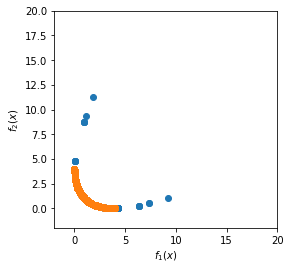

In [4]:
print('Algo Done Plotting')
# display the results
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])

ax.scatter([s.objectives[0] for s in nondominated_solutions],
           [s.objectives[1] for s in nondominated_solutions])
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.xlim(-2, 20)
plt.ylim(-2, 20)
plt.show()